<a href="https://colab.research.google.com/github/Gladsonvinod/DataAndBases/blob/master/lab2_distribute.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2: Digit Recognition with LogReg/RF/GBT
### Univ.AI 
### ML-2 Cohort-1


In [1]:
#Import libraries
import time
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from collections import OrderedDict
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

## Load the data

In [2]:
dataset = datasets.load_digits()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
X_train = X_train/255.0
X_test = X_test/255.0

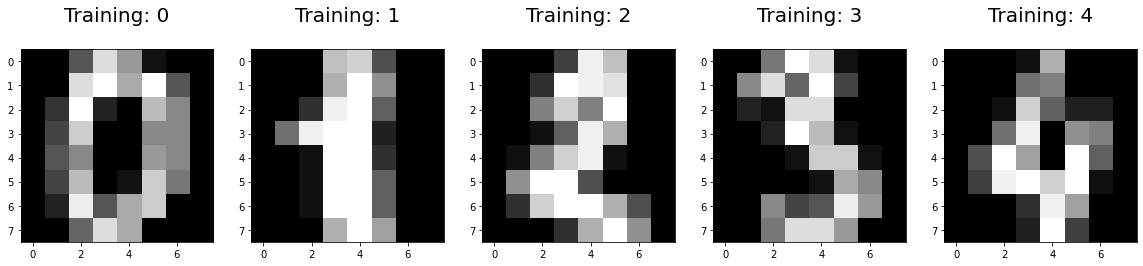

In [3]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(dataset.data[0:5], dataset.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

## Modelling

In [4]:
#Define a function to plot confusion matrix 
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,  cbar=False, ax=ax)
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Logistic Regression

In [6]:
c_values = {"C": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

#Hyper parameter tuning for Logistic regression
#your code here 
logreg=LogisticRegression()

#Finding the best value of C using GridSearchCV
#your code here 

logreg_cv=GridSearchCV(logreg,c_values,n_jobs=1)
logreg_cv.fit(X_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best parameter C= 1000


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [7]:
print("Best parameter C=",logreg_cv.best_params_['C'])

Best parameter C= 1000


In [10]:
best_c=logreg_cv.best_params_['C']
logreg=LogisticRegression(C=best_c)
logreg.fit(X_train,y_train)
y_test_pred=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [12]:
#Print accuracy score of test data

#your code here 
print("Accuracy:",accuracy_score(y_test_pred,y_test))

Accuracy: 0.9555555555555556


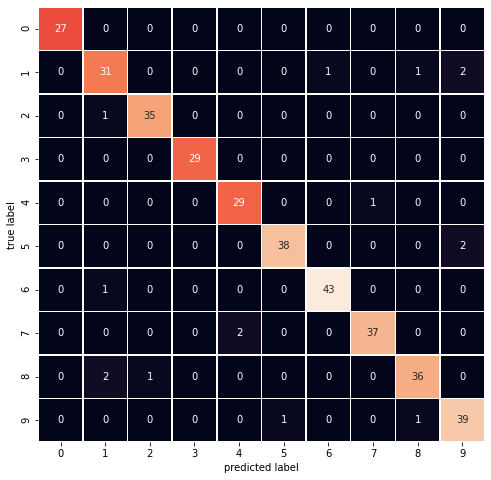

In [13]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_test_pred)

### Random Forest

In [14]:

#Create 2 models with same max_depth and different min_samples_leaf
ensemble_clfs = [(1,RandomForestClassifier(warm_start=True, min_samples_leaf=1,oob_score=True,max_depth = 10,random_state=420)),
                (5,RandomForestClassifier(warm_start=True, min_samples_leaf=5,oob_score=True,max_depth = 10,random_state=420))]

# Map a label (the value of `min_samples_leaf`) to a list of (model, oob error) tuples.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

min_estimators = 80
max_estimators = 500

#Create models for all n_estimators
#your code here 
for label, clf in ensemble_clfs: 
  for i in range(min_estimators, max_estimators):
    clf.n_estimators = i
    clf.fit(X_train, y_train)
    error_rate[label].append(1-clf.oob_score_)







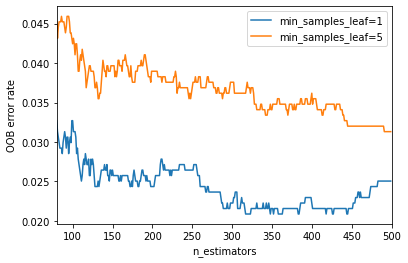

In [15]:
#Plot the OOB score vs n_estimators for different min_samples_leaf
plt.plot(range(80, 500), error_rate[1], label='min_samples_leaf=1')
plt.plot(range(80, 500), error_rate[5], label='min_samples_leaf=5')

#your code here 

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [16]:
#Find the best model by finding the lowest oob error and print out the min_samples_leaf and n_estimators for that model

min_err_1 = min(error_rate[1])
min_err_5 = min(error_rate[5])

print(min_err_1)
print(min_err_5)

best_leaf = 1 if min_err_1<min_err_5 else 5
best_num_estimators_index = error_rate[1].index(min(error_rate[1])) if best_leaf==1 else error_rate[5].index(min(error_rate[5])) 

best_num_estimators = range(80,500)[best_num_estimators_index]
#your code here 
print(f'Optimum num of estimators: {best_num_estimators} \nmin_samples_leaf: {best_leaf}')

0.02087682672233826
0.03131524008350728
Optimum num of estimators: 317 
min_samples_leaf: 1


In [17]:
#Build the best model taking the above best parameters

#your code here 
best_model = RandomForestClassifier(warm_start=True, min_samples_leaf=best_leaf,oob_score=True,max_depth = 10,random_state=420, n_estimators=best_num_estimators)
best_model.fit(X_train, y_train)
y_test_pred = best_model.predict(X_test)


In [18]:

#Print accuracy score of test data
#your code here 
print("Accuracy:", accuracy_score(y_test, y_test_pred))


Accuracy: 0.9777777777777777


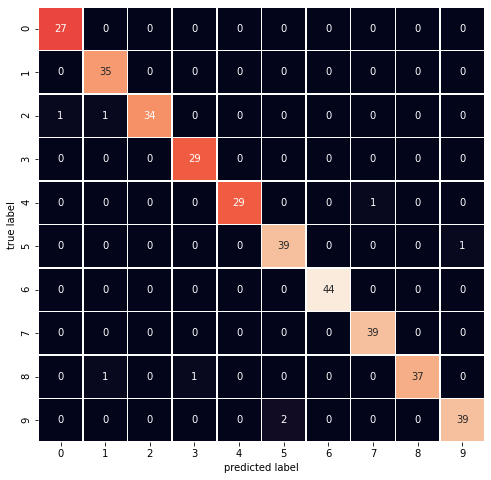

In [19]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_test_pred)

### Gradient Boosting

In [20]:

n_estimators = 500
# We specify that if the scores don't improve by atleast 0.01 for the last 5 stages, stop fitting additional stages

gboost_clf = GradientBoostingClassifier(warm_start=True, n_estimators=n_estimators, random_state=420)

#your code here
gboost_clf.fit(X_train, y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=420, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [21]:
#Predicting on the test data and calculating the accuracy score

#your code here
y_test_pred = gboost_clf.predict(X_test)
#Print accuracy score of test data
#your code here
print("Accuracy:", accuracy_score(y_test, y_test_pred))

Accuracy: 0.9583333333333334


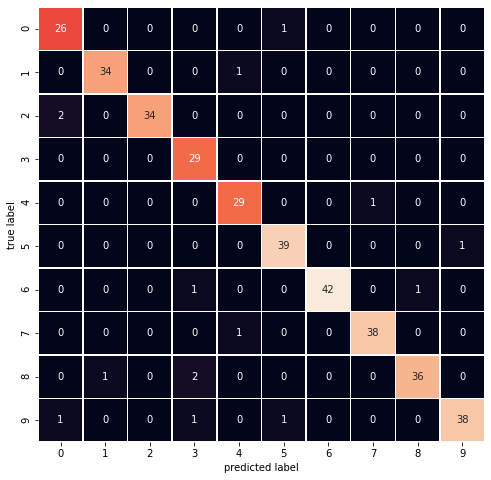

In [22]:
#Plot confusion matrix of test data
plot_confusion_matrix(y_test, y_test_pred)

#### **Optional**

In [ ]:
#Create a model with early stopping



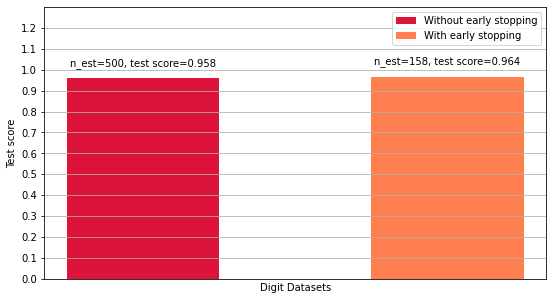

In [ ]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here

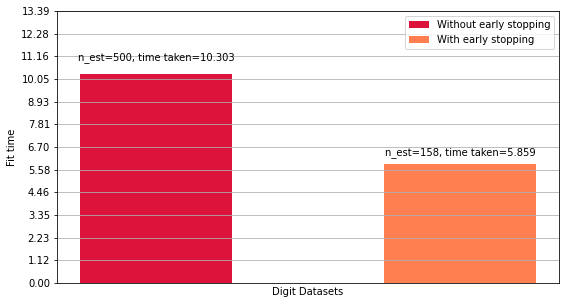

In [ ]:
#Plot the test score for the gradient boosting model with and without early stopping
#your code here

Which model did the best?